# <b><span style='color:#F1A424'>AutoML - Regression - Fish Weight Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [4]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [5]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [6]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [7]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,920,35.0,38.5,44.1,18.0369,6.3063
Bream,620,31.5,34.5,39.7,15.5227,5.2801
Bream,650,31.0,33.5,38.7,14.4738,5.7276
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,290,24.0,26.3,31.2,12.48,4.3056
Bream,955,35.0,38.5,44.0,18.084,6.292
Bream,950,38.0,41.0,46.5,17.6235,6.3705


In [8]:
# fish_df dataset
fish_df.shape

(159, 7)

In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [10]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Bream,500,28.5,30.7,36.2,14.2266,4.9594,1
Bream,500,29.1,31.5,36.4,13.7592,4.368,2
Bream,340,29.5,32.0,37.3,13.9129,5.0728,1
Bream,600,29.4,32.0,37.2,14.9544,5.1708,2
Bream,700,30.4,33.0,38.5,14.938,5.1975,1
Bream,610,30.9,33.5,38.6,15.633,5.1338,2
Bream,700,30.4,33.0,38.3,14.8604,5.2854,2
Bream,475,28.4,31.0,36.2,14.2628,5.1042,1
Bream,450,27.6,30.0,35.1,14.0049,4.8438,2
Bream,450,26.8,29.7,34.7,13.6024,4.9274,1


In [11]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
fish_df_train.shape

(127, 7)

In [13]:
# test data shape
fish_df_test.shape

(32, 7)

In [14]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,680,31.8,35.0,40.6,15.4686,6.1306
Bream,700,31.9,35.0,40.5,16.2405,5.589
Bream,620,31.5,34.5,39.7,15.5227,5.2801
Bream,500,28.7,31.0,36.2,14.3714,4.8146
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [15]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,650,31.0,33.5,38.7,14.4738,5.7276
Bream,610,30.9,33.5,38.6,15.633,5.1338
Bream,600,29.4,32.0,37.2,14.9544,5.1708
Bream,450,27.6,30.0,35.1,14.0049,4.8438
Perch,260,25.4,27.5,28.9,7.1672,4.335
Perch,70,15.7,17.4,18.5,4.588,2.9415
Parkki,300,24.0,26.0,29.0,11.368,4.234
Bream,700,30.4,33.0,38.3,14.8604,5.2854
Bream,955,35.0,38.5,44.0,18.084,6.292
Bream,500,29.1,31.5,36.4,13.7592,4.368


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Excluded 'glm' and 'knn' from model training.
# Keeping early stopping timer threshold to 200 sec and max_models to 6
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Regression", 
             exclude=['glm', 'knn'],
             max_runtime_secs=200,
             max_models=6,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 127
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0
Weight,INTEGER,127,0,None,1,126,0,0.0,100.0
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Width,FLOAT,127,0,None,0,127,0,0.0,100.0


         Weight  Length1  Length2  Length3   Height    Width
func                                                        
50%     270.000   24.100   26.500   29.200    7.786    4.204
count   127.000  127.000  127.000  127.000  127.000  127.000
mean    375.819   25.741   27.872   30.672    8.945    4.368
min       0.000    7.500    8.400    8.800    1.728    1.048
max    1550.000   56.000   60.000   64.000   18.957    8.142
75%     587.500   32.000   35.000   39.450   12.143    5.575
25%     127.500   19.250   21.000   23.350    6.112    3.402
std     331.586    9.376   10.077   10.970    4.287    1.663

Statistics of Data:


func,Weight,Length1,Length2,Length3,Height,Width
min,0,7.5,8.4,8.8,1.728,1.048
std,331.586,9.376,10.077,10.97,4.287,1.663
25%,127.5,19.25,21,23.35,6.112,3.402
50%,270,24.1,26.5,29.2,7.786,4.204
75%,587.5,32,35,39.45,12.143,5.575
max,1550,56,60,64,18.957,8.142
mean,375.819,25.741,27.872,30.672,8.945,4.368
count,127,127,127,127,127,127



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         

No Futile columns found.

Target Column Distribution:


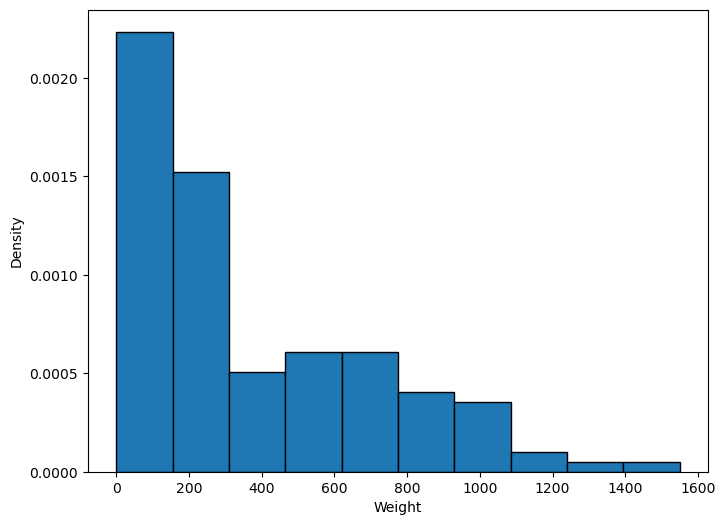

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length1           1.574803
1    Length2           0.787402
2     Weight           0.787402
3    Length3           0.787402


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['Species']


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,925,36.2,39.5,45.3,18.7542,6.7497,50
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,74
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,82
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,90
1,0,0,0,0,0,0,290,24.0,26.3,31.2,12.48,4.3056,106
1,0,0,0,0,0,0,500,28.7,31.0,36.2,14.3714,4.8146,114
0,1,0,0,0,0,0,120,17.5,19.0,21.3,8.3922,2.9181,24
0,1,0,0,0,0,0,200,21.2,23.0,25.8,10.3458,3.6636,40
0,1,0,0,0,0,0,55,13.5,14.7,16.5,6.8475,2.3265,48
0,1,0,0,0,0,0,150,18.4,20.0,22.4,8.8928,3.2928,56


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0     Weight           0.787402
1    Length3           0.787402
2    Length2           0.787402
3    Length1           1.574803


['Length1', 'Length3', 'Weight', 'Length2']


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,1,0,0,0,0,0,60,14.3,15.5,17.4,6.5772,2.3142,80
0,0,1,0,0,0,0,900,36.5,39.0,41.4,11.1366,7.4934,104
0,0,1,0,0,0,0,700,34.0,36.0,38.3,10.6091,6.7408,112
0,0,1,0,0,0,0,135,20.0,22.0,23.5,5.875,3.525,120
0,0,1,0,0,0,0,250,25.9,28.0,29.4,7.8204,4.2042,144
0,0,1,0,0,0,0,180,23.0,25.0,26.5,6.4395,3.6835,152
1,0,0,0,0,0,0,925,36.2,39.5,45.3,18.7542,6.7497,50
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,74
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,82
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,90


['Species_5', 'Species_4', 'Species_0', 'Species_1', 'Species_3', 'Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['Length1', 'Length2', 'Length3', 'Height', 'Width']


id,Weight,Species_5,Species_4,Species_0,Species_1,Species_3,Species_2,Length1,Length2,Length3,Height,Width
12,145,0,1,0,0,0,0,-0.5508662208713092,-0.5761608574802117,-0.571934563248618,-0.5328441399724315,-0.4769239488285387
15,8,1,0,0,0,0,0,-1.66667860444375,-1.719846145221061,-1.7113628410733064,-1.6154317338709792,-1.852109279895468
16,170,0,0,0,1,0,0,-0.7234145276093156,-0.7151132756169505,-0.6790602987705975,0.10942559242166185,-0.560434275217912
18,575,0,0,1,0,0,0,0.6914815876423365,0.7064768483973762,0.9083483276005496,1.4424009520933387,0.7518448056212136
21,500,0,0,0,0,1,0,1.9223261757067815,1.8822280787851653,1.7361381020885711,-0.4570162699700007,0.34249833674753893
23,12,1,0,0,0,0,0,-1.5171367386041448,-1.5381391368884028,-1.5944984023220563,-1.5459519192229378,-1.8699783016993077
20,0,0,1,0,0,0,0,-0.7234145276093156,-0.7364905707149102,-0.7180151116876806,-0.5697465716479473,-0.5961723188255915
13,300,0,0,0,0,1,0,0.8525266739311427,0.8133633238871752,0.8401774049956534,-0.6950334663345762,0.03155304576643743
10,720,0,0,1,0,0,0,0.7720041307867394,0.8133633238871752,1.015474063122529,1.7291795846416294,1.0681994263320493
8,273,0,0,0,1,0,0,-0.26328570964129866,-0.25550143101081474,-0.21160254376559703,0.5028655066937029,-0.11455963592210229


['Species_5', 'Species_6', 'Species_4', 'Species_0', 'Species_1', 'Species_3', 'Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']


id,r_Species_6,Weight,r_Species_5,r_Species_0,r_Species_3,r_Species_4,r_Species_2,r_Species_1,r_Length1,r_Length2,r_Length3,r_Height,r_Width
12,0,145,0,0,0,1,0,0,-0.5508662208713092,-0.5761608574802117,-0.571934563248618,-0.5328441399724315,-0.4769239488285387
15,0,8,1,0,0,0,0,0,-1.66667860444375,-1.719846145221061,-1.7113628410733064,-1.6154317338709792,-1.852109279895468
16,0,170,0,0,0,0,0,1,-0.7234145276093156,-0.7151132756169505,-0.6790602987705975,0.10942559242166185,-0.560434275217912
18,0,575,0,1,0,0,0,0,0.6914815876423365,0.7064768483973762,0.9083483276005496,1.4424009520933387,0.7518448056212136
21,0,500,0,0,1,0,0,0,1.9223261757067815,1.8822280787851653,1.7361381020885711,-0.4570162699700007,0.34249833674753893
23,0,12,1,0,0,0,0,0,-1.5171367386041448,-1.5381391368884028,-1.5944984023220563,-1.5459519192229378,-1.8699783016993077
20,0,0,0,0,0,1,0,0,-0.7234145276093156,-0.7364905707149102,-0.7180151116876806,-0.5697465716479473,-0.5961723188255915
13,0,300,0,0,1,0,0,0,0.8525266739311427,0.8133633238871752,0.8401774049956534,-0.6950334663345762,0.03155304576643743
10,0,720,0,1,0,0,0,0,0.7720041307867394,0.8133633238871752,1.015474063122529,1.7291795846416294,1.0681994263320493
8,0,273,0,0,0,0,0,1,-0.26328570964129866,-0.25550143101081474,-0.21160254376559703,0.5028655066937029,-0.11455963592210229


['Length1', 'Length2', 'Length3', 'Height', 'Width']


id,Species_5,Species_6,Species_4,Weight,Species_0,Species_1,Species_3,Species_2,Length1,Length2,Length3,Height,Width
82,0,0,0,850,1,0,0,0,0.8640298943803432,0.9202497993769743,1.1128610954152378,1.851908654826491,1.1340838468604932
106,0,0,0,290,1,0,0,0,-0.1482535051492941,-0.11654901287407637,0.10003595957107013,0.826546570917511,-0.01634079498671075
114,0,0,0,500,1,0,0,0,0.3923978559631259,0.385817421927979,0.5869711210346125,1.266352867521612,0.29302424236548025
122,0,0,0,475,1,0,0,0,0.3578881946155245,0.385817421927979,0.5869711210346125,1.2411001638041512,0.4690401850318736
146,0,0,0,390,1,0,0,0,0.2658624310219214,0.27893094643818,0.4701066822833621,0.8707271759480593,0.21729362614920722
154,0,0,0,975,1,0,0,0,1.393178035043563,1.4546821768259695,1.5316253342738837,2.257858656207182,1.467699699517895
48,0,0,0,55,0,1,0,0,-1.356091652315339,-1.3564321285557455,-1.3315534151317434,-0.4831758387380877,-1.2192177015166143
72,0,0,0,145,0,1,0,0,-0.631388764015712,-0.6296040952251118,-0.5914119697071594,0.18857863427639227,-0.714387446065279
80,0,0,0,60,0,1,0,0,-1.2640658887217355,-1.2709229481639062,-1.2439050860683059,-0.5460285626315468,-1.2266935167610777
88,0,0,0,40,0,0,0,1,-1.3215819909677375,-1.3243661859088056,-1.3802469312780976,-1.186228782474209,-1.1550958715742643


['col_0', 'col_1', 'col_2', 'col_3']


response_column : Weight                                                                                                                              
name : svm
model_type : regression
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : ('Invtime', 'Adaptive', 'constant')
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 15552
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2,

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,rfe,47.240955,6011.971676,0.041518,16.395559,-7.558717,77.536905,0.203760,216.919976,0.931365,0.934928,12.358868,0.040318,0.924011
1,2,XGBOOST_2,pca,124.212769,29329.736668,0.310883,39.268984,39.268984,171.259267,0.557568,434.527852,0.665159,0.841301,71.159775,0.449655,0.653997
2,3,DECISIONFOREST_2,pca,176.221167,43976.011351,1.673942,407.183623,-388.408201,209.704581,1.293809,493.195833,0.497950,0.507133,146.801099,0.889479,0.481215
3,4,DECISIONFOREST_1,rfe,182.783667,46028.721149,1.810933,459.220080,-443.191272,214.543052,1.345709,437.195833,0.474515,0.503604,158.329867,0.936936,0.418214
4,5,XGBOOST_0,lasso,156.085669,52451.012987,0.435377,45.668541,45.668541,229.021861,0.659831,585.425802,0.401196,0.679332,131.274936,0.619977,0.342905
5,6,DECISIONFOREST_0,lasso,264.719471,87732.781925,2.292670,590.652628,-568.664274,296.197201,1.514157,576.455747,-0.001597,0.080624,264.906388,1.216869,-0.099097


In [17]:
# Fitting train data
aml.fit(fish_df_train, fish_df_train.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,rfe,47.240955,6011.971676,0.041518,16.395559,-7.558717,77.536905,0.203760,216.919976,0.931365,0.934928,12.358868,0.040318,0.924011
1,2,XGBOOST_2,pca,124.212769,29329.736668,0.310883,39.268984,39.268984,171.259267,0.557568,434.527852,0.665159,0.841301,71.159775,0.449655,0.653997
2,3,DECISIONFOREST_2,pca,176.221167,43976.011351,1.673942,407.183623,-388.408201,209.704581,1.293809,493.195833,0.497950,0.507133,146.801099,0.889479,0.481215
3,4,DECISIONFOREST_1,rfe,182.783667,46028.721149,1.810933,459.220080,-443.191272,214.543052,1.345709,437.195833,0.474515,0.503604,158.329867,0.936936,0.418214
4,5,XGBOOST_0,lasso,156.085669,52451.012987,0.435377,45.668541,45.668541,229.021861,0.659831,585.425802,0.401196,0.679332,131.274936,0.619977,0.342905
5,6,DECISIONFOREST_0,lasso,264.719471,87732.781925,2.292670,590.652628,-568.664274,296.197201,1.514157,576.455747,-0.001597,0.080624,264.906388,1.216869,-0.099097


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,rfe,47.240955,6011.971676,0.041518,16.395559,-7.558717,77.536905,0.20376,216.919976,0.931365,0.934928,12.358868,0.040318,0.924011


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=1)

{'response_column': 'Weight',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.2,
 'lambda1': 0.1,
 'shrinkage_factor': 0.5,
 'max_depth': 10,
 'min_node_size': 2,
 'iter_num': 20,
 'seed': 42,
 'persist': False,
 'max_models': 1}

In [21]:
aml.model_hyperparameters(rank=4)

{'response_column': 'Weight',
 'name': 'decision_forest',
 'tree_type': 'Regression',
 'min_impurity': 0.2,
 'max_depth': 8,
 'min_node_size': 2,
 'num_trees': 20,
 'seed': 42,
 'persist': False,
 'max_models': 1}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(fish_df_test)

Data Transformation started ...


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,650,31.0,33.5,38.7,14.4738,5.7276,50
1,0,0,0,0,0,0,700,30.4,33.0,38.3,14.8604,5.2854,34
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,18
1,0,0,0,0,0,0,450,27.6,30.0,35.1,14.0049,4.8438,10
0,0,1,0,0,0,0,115,19.0,21.0,22.5,5.9175,3.3075,40
0,0,1,0,0,0,0,260,25.4,27.5,28.9,7.1672,4.335,48
0,0,1,0,0,0,0,78,16.8,18.7,19.4,5.1992,3.1234,56
0,0,1,0,0,0,0,850,36.9,40.0,42.3,11.9286,7.1064,72
0,0,1,0,0,0,0,900,37.0,40.0,42.5,11.73,7.225,80
0,0,1,0,0,0,0,1015,37.0,40.0,42.4,12.3808,7.4624,88


id,Species_5,Species_4,Species_0,Species_1,Species_3,Species_2,Length1,Length2,Length3,Height,Width,Weight
34,0,0,1,0,0,0,30.4,33.0,38.3,14.8604,5.2854,700
40,0,0,0,0,0,1,19.0,21.0,22.5,5.9175,3.3075,115
37,0,0,0,0,1,0,59.0,63.4,68.0,10.812,7.48,1650
36,0,1,0,0,0,0,16.5,18.2,20.3,5.2983,2.8217,69
45,0,0,0,0,1,0,40.0,42.5,45.5,6.825,4.459,510
21,0,0,0,0,1,0,44.8,48.0,51.2,7.68,5.376,770
15,1,0,0,0,0,0,13.2,14.3,15.2,2.8728,2.0672,19
32,0,0,0,0,0,1,20.0,22.0,23.5,5.64,3.525,120
26,0,0,1,0,0,0,29.4,32.0,37.2,14.9544,5.1708,600
20,0,1,0,0,0,0,20.4,22.0,24.7,5.8045,3.7544,150


id,Weight,Species_5,Species_4,Species_0,Species_1,Species_3,Species_2,Length1,Length2,Length3,Height,Width
36,69,0,1,0,0,0,0,-1.010995038839326,-0.982329464341448,-0.9614826924194517,-0.8434105403871703,-0.9182401641947976
40,115,0,0,0,0,0,1,-0.7234145276093156,-0.6830473329700107,-0.7472312213754932,-0.6994282738876147,-0.6229758515313509
37,1650,0,0,0,0,1,0,3.8778736520708534,3.8489392277974668,3.6838787479427393,0.43868736464932734,1.9130273279421581
15,19,1,0,0,0,0,0,-1.3906013136629403,-1.399186718751664,-1.4581565571122648,-1.4074108430271446,-1.3768176115076225
34,700,0,0,1,0,0,0,0.5879526035995324,0.5995903729075772,0.7914838888492992,1.3800597931002332,0.5791717071698241
13,430,0,0,0,0,1,0,1.174616846508754,1.1340227503565723,1.005735359893258,-0.380281534916943,0.14830947734866892
45,510,0,0,0,0,1,0,1.692261766722773,1.6150118900606678,1.4926705213568001,-0.48840775249170615,0.07689416911903708
21,770,0,0,0,0,1,0,2.244416348284393,2.2028875052545622,2.047776605425238,-0.2895950298542385,0.6342374682387997
80,900,0,0,0,0,0,1,1.3471651532467606,1.3477957013361703,1.2005094244786747,0.6521494457969245,1.7580409143374254
72,850,0,0,0,0,0,1,1.3356619327975598,1.3477957013361703,1.1810320180201328,0.6983298045288554,1.6859570372647934


id,Species_5,Species_6,Species_4,Species_0,Species_1,Species_3,Species_2,Length1,Length2,Length3,Height,Width,Weight
36,0,0,1,0,0,0,0,16.5,18.2,20.3,5.2983,2.8217,69
80,0,0,0,0,0,0,1,37.0,40.0,42.5,11.73,7.225,900
72,0,0,0,0,0,0,1,36.9,40.0,42.3,11.9286,7.1064,850
45,0,0,0,0,0,1,0,40.0,42.5,45.5,6.825,4.459,510
15,1,0,0,0,0,0,0,13.2,14.3,15.2,2.8728,2.0672,19
32,0,0,0,0,0,0,1,20.0,22.0,23.5,5.64,3.525,120
50,0,0,0,1,0,0,0,31.0,33.5,38.7,14.4738,5.7276,650
48,0,0,0,0,0,0,1,25.4,27.5,28.9,7.1672,4.335,260
26,0,0,0,1,0,0,0,29.4,32.0,37.2,14.9544,5.1708,600
20,0,0,1,0,0,0,0,20.4,22.0,24.7,5.8045,3.7544,150


id,Weight,r_Species_6,r_Species_5,r_Species_0,r_Species_3,r_Species_4,r_Species_2,r_Species_1,r_Length1,r_Length2,r_Length3,r_Height,r_Width
15,19,0,1,0,0,0,0,0,-1.3906013136629403,-1.399186718751664,-1.4581565571122648,-1.4074108430271446,-1.3768176115076225
26,600,0,0,1,0,0,0,0,0.4729203991075282,0.49270389741777826,0.6843581533273205,1.4019175661153465,0.5095189895262855
20,150,0,0,0,0,1,0,0,-0.5623694413205098,-0.5761608574802117,-0.5329797503315349,-0.7257041074057832,-0.3513545643158421
36,69,0,0,0,0,1,0,0,-1.010995038839326,-0.982329464341448,-0.9614826924194517,-0.8434105403871703,-0.9182401641947976
50,650,0,0,1,0,0,0,0,0.6569719262947351,0.6530336106524768,0.8304387017663831,1.2901638883380753,0.8479363820561476
48,260,0,0,0,0,0,1,0,0.0127915811395113,0.011714757713682768,-0.12395421470215962,-0.40883615753668684,0.0015282268171283354
45,510,0,0,0,1,0,0,0,1.692261766722773,1.6150118900606678,1.4926705213568001,-0.48840775249170615,0.07689416911903708
21,770,0,0,0,1,0,0,0,2.244416348284393,2.2028875052545622,2.047776605425238,-0.2895950298542385,0.6342374682387997
80,900,0,0,0,0,0,1,0,1.3471651532467606,1.3477957013361703,1.2005094244786747,0.6521494457969245,1.7580409143374254
72,850,0,0,0,0,0,1,0,1.3356619327975598,1.3477957013361703,1.1810320180201328,0.6983298045288554,1.6859570372647934


id,Weight,Species_6,Species_5,Species_4,Species_0,Species_1,Species_3,Species_2,Length1,Length2,Length3,Height,Width
40,115,0,0,0,0,0,0,1,-0.7234145276093155,-0.6830473329700113,-0.7472312213754929,-0.699428273887614,-0.6229758515313505
34,700,0,0,0,1,0,0,0,0.587952603599533,0.5995903729075771,0.7914838888492995,1.380059793100234,0.5791717071698247
13,430,0,0,0,0,0,1,0,1.174616846508755,1.1340227503565723,1.0057353598932584,-0.38028153491694217,0.14830947734866948
45,510,0,0,0,0,0,1,0,1.6922617667227742,1.615011890060668,1.4926705213568003,-0.4884077524917053,0.07689416911903764
15,19,0,1,0,0,0,0,0,-1.3906013136629403,-1.399186718751665,-1.4581565571122643,-1.407410843027144,-1.376817611507622
32,120,0,0,0,0,0,0,1,-0.6083823231173112,-0.5761608574802123,-0.6498441890827845,-0.7639552101822309,-0.49078155757437325
36,69,0,0,1,0,0,0,0,-1.010995038839326,-0.9823294643414487,-0.9614826924194514,-0.8434105403871696,-0.9182401641947973
28,272,0,0,1,0,0,0,0,-0.03322130065728983,-0.041728480031217124,0.04160374019544529,-0.08310883371146423,0.2681048582172682
80,900,0,0,0,0,0,0,1,1.3471651532467614,1.3477957013361703,1.2005094244786751,0.6521494457969254,1.7580409143374263
72,850,0,0,0,0,0,0,1,1.3356619327975607,1.3477957013361703,1.1810320180201332,0.6983298045288562,1.685957037264794


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,Weight
0,26,-1.617261,-1.088428,0.195271,-0.210604,600
1,34,-1.790432,-0.997661,0.223928,-0.207073,700
2,40,1.551678,0.293415,-0.561055,-0.226389,115
3,45,-2.061657,1.650954,1.370765,-0.293827,510
4,80,-2.812049,0.707927,-0.756914,0.092702,900
5,50,-1.948628,-0.895228,0.135345,-0.126583,650
6,36,2.136307,-0.095732,0.275194,0.820862,69
7,15,3.199085,0.024946,0.353011,-0.239387,19
8,20,1.249497,0.110685,0.225001,0.917631,150
9,13,-1.455416,1.233409,1.057669,-0.187689,430


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  Weight
0  15   32.993940         32.993940         32.993940      19
1  34  696.667679        696.667679        696.667679     700
2  13  432.345396        432.345396        432.345396     430
3  36   77.159276         77.159276         77.159276      69
4  50  626.908677        626.908677        626.908677     650
5  48  256.956895        256.956895        256.956895     260
6  40   99.363809         99.363809         99.363809     115
7  37  915.504922        915.504922        915.504922    1650
8  45  388.007253        388.007253        388.007253     510
9  21  568.677211        568.677211        568.677211     770


In [23]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,Weight
12,82.52385799999999,82.52385799999999,82.52385799999999,78
15,32.993939999999995,32.993939999999995,32.993939999999995,19
16,39.907444999999996,39.907444999999996,39.907444999999996,32
18,350.30328199999997,350.30328199999997,350.30328199999997,500
21,568.6772109999999,568.6772109999999,568.6772109999999,770
23,32.993939999999995,32.993939999999995,32.993939999999995,19
20,133.814212,133.814212,133.814212,150
13,432.34539599999994,432.34539599999994,432.34539599999994,430
10,475.091131,475.091131,475.091131,450
8,274.396577,274.396577,274.396577,300


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(fish_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Performance Metrics : 
        MAE           MSE      MSLE       MAPE       MPE        RMSE     RMSLE          ME       R2        EV        MPD       MGD
0  83.24744  42462.498579  0.065073  17.193586  0.151194  206.064307  0.255094  846.122158  0.77661  0.797579  44.182919  0.073153


In [25]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
83.2474400625,42462.4985793462,0.06507319408658034,17.19358606414227,0.1511937650026286,206.06430690283602,0.2550944807058364,846.122158,0.7766101452274004,0.7975785957745694,44.18291940394445,0.0731525707725495


In [26]:
# Generating prediction on test data
prediction = aml.predict(fish_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : pca

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  Weight
0  40   68.941593         68.941593         68.941593     115
1  80  532.138428        532.138428        532.138428     900
2  50  419.831298        419.831298        419.831298     650
3  36   18.257558         18.257558         18.257558      69
4  20   80.967564         80.967564         80.967564     150
5  13  237.726427        237.726427        237.726427     430
6  15   14.295089         14.295089         14.295089      19
7  45  334.698527        334.698527        334.698527     510
8  34  430.836709        430.836709        430.836709     700
9  26  397.052612        397.052612        397.052612     600


In [27]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,Weight
12,18.257558,18.257558,18.257558,78
15,14.295089,14.295089,14.295089,19
16,24.022711,24.022711,24.022711,32
18,261.890632,261.890632,261.890632,500
21,610.7705589999998,610.7705589999998,610.7705589999998,770
23,14.295089,14.295089,14.295089,19
20,80.967564,80.967564,80.967564,150
13,237.726427,237.726427,237.726427,430
10,312.065205,312.065205,312.065205,450
8,167.605064,167.605064,167.605064,300


In [28]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(fish_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : pca

Performance Metrics : 
          MAE           MSE      MSLE       MAPE        MPE        RMSE     RMSLE           ME        R2        EV         MPD       MGD
0  201.743208  96257.955168  0.351524  39.687065  39.687065  310.254662  0.592895  1029.906344  0.493599  0.707718  143.038399  0.504925


In [29]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
201.74320793749996,96257.95516784451,0.35152415240214946,39.68706534840945,39.68706534840945,310.2546617987303,0.5928947228658301,1029.906344,0.4935990263156276,0.7077182918688842,143.03839873153603,0.5049250827930201


In [30]:
remove_context()

True